In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from itertools import combinations



In [6]:
# Load the datasets
df= pd.read_csv('../data/data.csv', sep=';')
# Check the first few rows of the dataset
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
# Check the shape of the dataset
print(df.shape)

df.info()

(4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification        

In [8]:
df.isnull().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [9]:
df.describe()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Data Cleaning

In [13]:
# Correct a column name that has a typo and replace single quotes with underscores
df.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Daytime/evening_attendance\t": "Daytime/evening_attendance",
                           "Age at enrollment": "Age"}, inplace = True)

# Replace white space in the column names with underscore
df.columns = df.columns.str.replace(' ', '_')

# Remove the parenthesis
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

In [14]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nationality', 'Mother_qualification',
       'Father_qualification', 'Mother_occupation', 'Father_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemp

In [15]:
# Change data types of columns that should be categorical
col = ['Marital_status', 'Application_mode', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

df[col] = df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime/evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nationality                                   4424 non-null   category
 8   Mother_qualification                          4424 non-null   category
 9   Father_qualification                          4424 n

In [17]:
cat_columns = df.select_dtypes(include='category')

# Check the number of unique values in each categorical column
for col in cat_columns.columns:
    n_val = df[col].nunique()
    print(f"{col}: {n_val} unique values")


Marital_status: 6 unique values
Application_mode: 18 unique values
Course: 17 unique values
Daytime/evening_attendance: 2 unique values
Previous_qualification: 17 unique values
Nationality: 21 unique values
Mother_qualification: 29 unique values
Father_qualification: 34 unique values
Mother_occupation: 32 unique values
Father_occupation: 46 unique values
Displaced: 2 unique values
Educational_special_needs: 2 unique values
Debtor: 2 unique values
Tuition_fees_up_to_date: 2 unique values
Gender: 2 unique values
Scholarship_holder: 2 unique values
International: 2 unique values
Target: 3 unique values


In [18]:
# Save the DataFrame to a CSV file
df.to_csv('data/data_cleaned.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'

## Explore the dataset

In [19]:
# Check the first few rows of the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime/evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nationality                                   4424 non-null   category
 8   Mother_qualification                          4424 non-null   category
 9   Father_qualification                          4424 n

In [20]:
df.value_counts('Target')

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Text(0.5, 1.0, 'Target variable distribution')

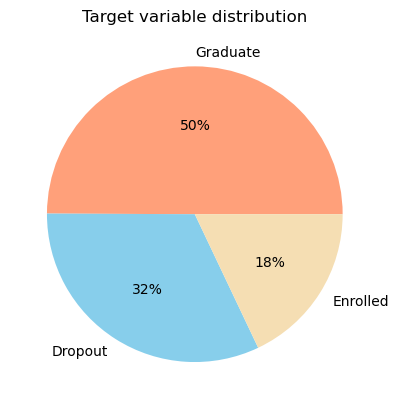

In [21]:
# Check the proportion of the labels in the target variable
labels = df['Target'].value_counts().index
values = df['Target'].value_counts().values

plt.pie(values, labels = labels, colors = ['lightsalmon', 'skyblue', 'wheat'], 
        autopct = '%1.0f%%')
plt.title('Target variable distribution')

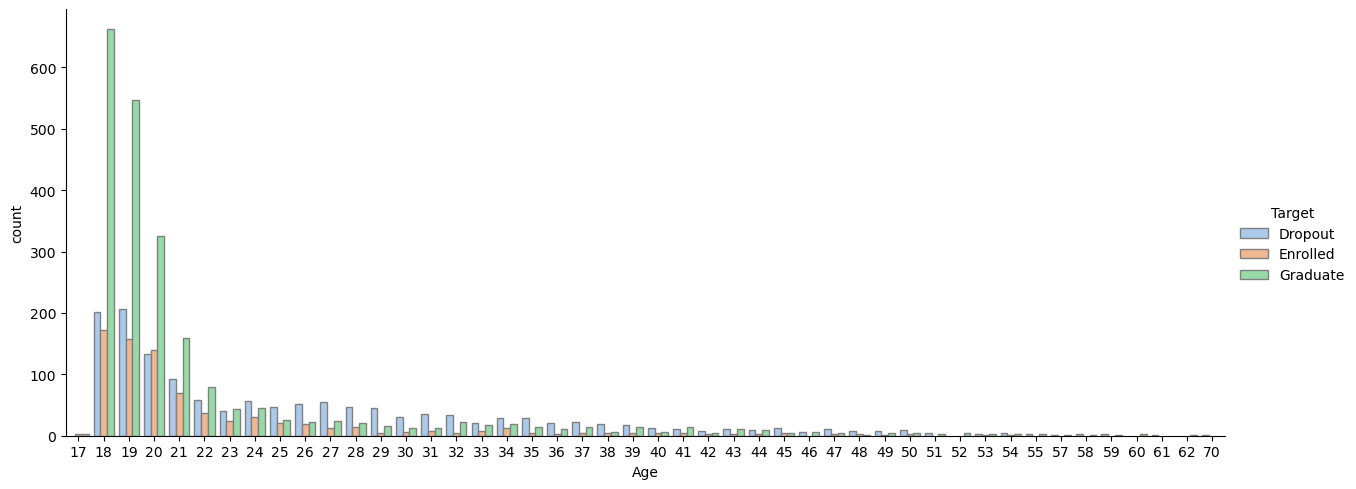

In [22]:
sns.catplot(x = "Age",
            hue = "Target",
            kind = "count",
            palette = "pastel", 
            edgecolor = ".5",
            data = df,
            height = 5,
            aspect = 2.5)
plt.show()

C:\Users\Martina\AppData\Local\Temp\ipykernel_4332\2028802794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Age', data=df, palette='pastel')


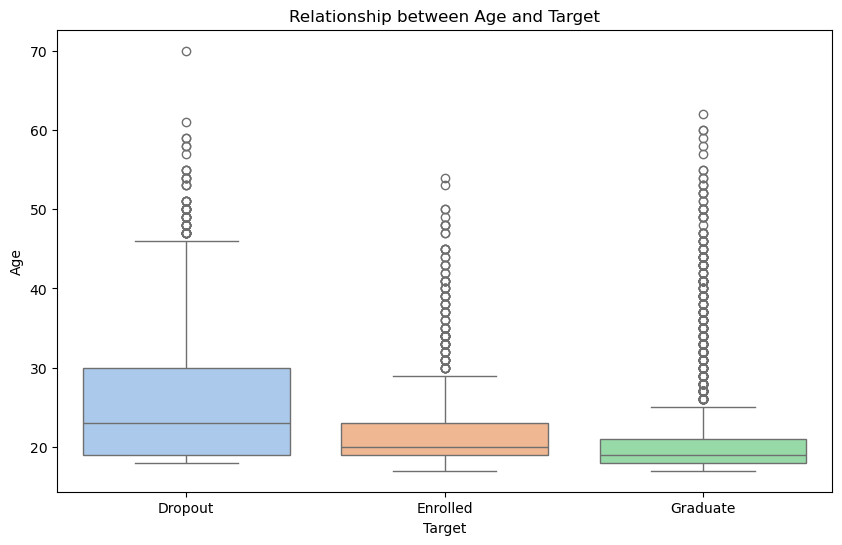

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df, palette='pastel')
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

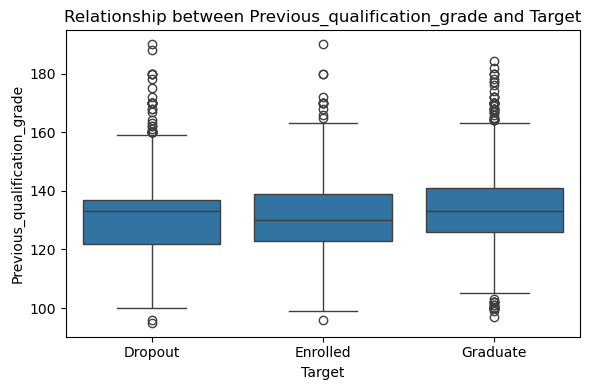

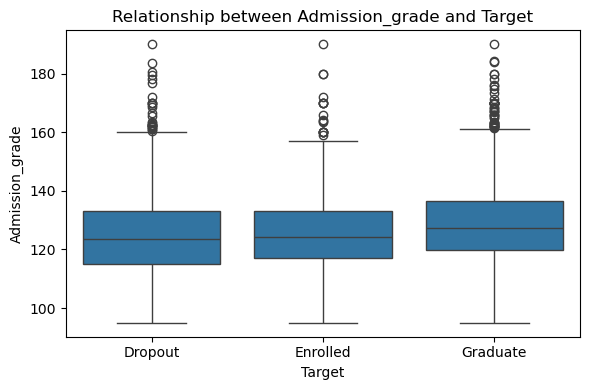

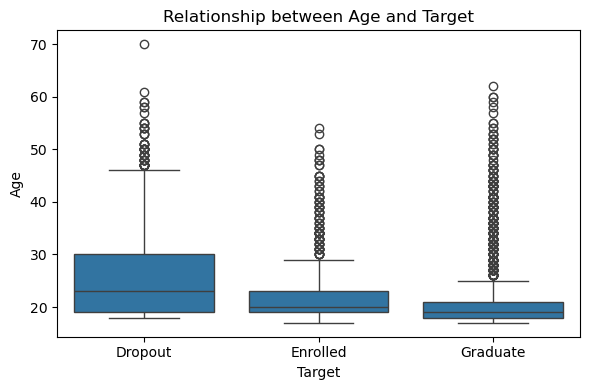

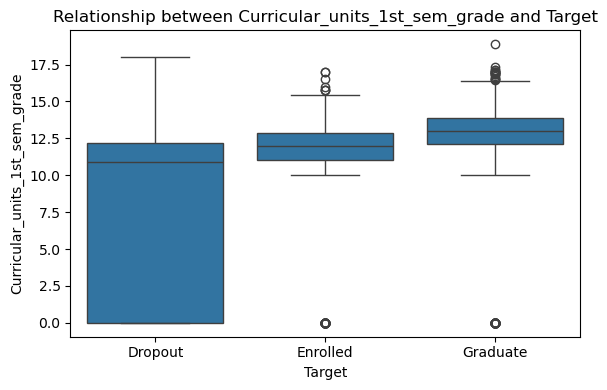

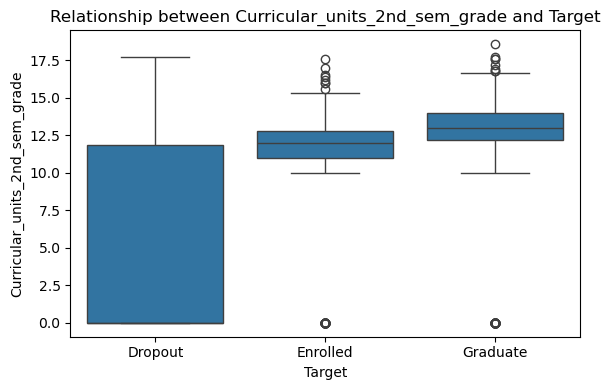

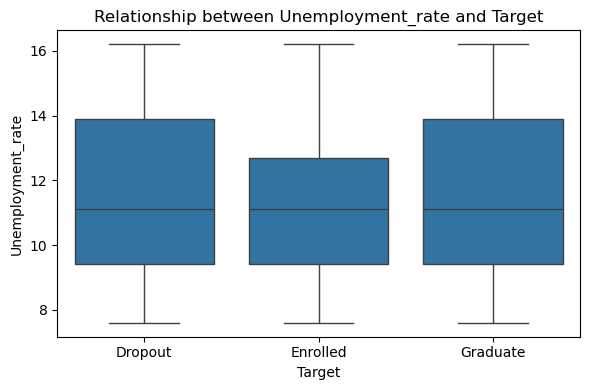

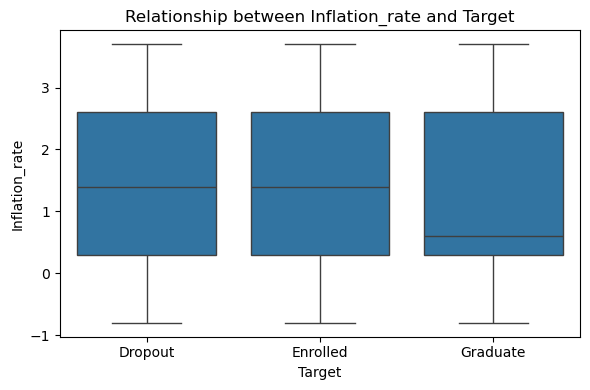

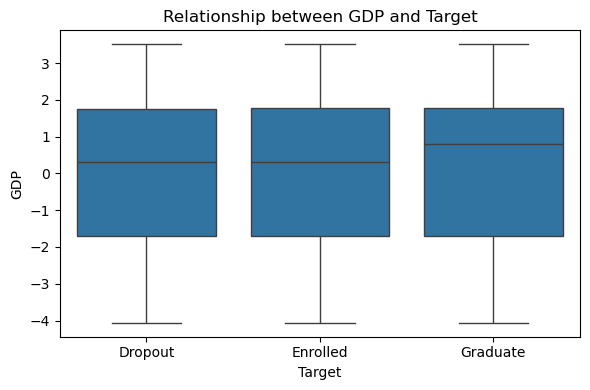

C:\Users\Martina\AppData\Local\Temp\ipykernel_4332\471845174.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Target')[numeric_cols].describe()


Previous_qualification_grade                                      \
                                count        mean        std   min    25%   
Target                                                                      
Dropout                        1421.0  131.114075  12.873354  95.0  122.0   
Enrolled                        794.0  131.208438  12.872111  96.0  123.0   
Graduate                       2209.0  134.082707  13.342121  97.0  126.0   

                              Admission_grade              ... Inflation_rate  \
            50%    75%    max           count        mean  ...            75%   
Target                                                     ...                  
Dropout   133.1  137.0  190.0          1421.0  124.961365  ...            2.6   
Enrolled  130.0  139.0  190.0           794.0  125.534257  ...            2.6   
Graduate  133.1  141.0  184.4          2209.0  128.794432  ...            2.6   

                  GDP                                                   
          max   count      mean       std   min  25%   50%   75%   max  
Target                                                                  
Dropout   3.7  1421.0 -0.150859  2.251768 -4.06 -1.7  0.32  1.74  3.51  
Enrolled  3.7   794.0  0.053287  2.315631 -4.06 -1.7  0.32  1.79  3.51  
Graduate  3.7  2209.0  0.081833  2.261081 -4.06 -1.7  0.79  1.79  3.51  

[3 rows x 64 columns]

In [24]:
# Lista delle variabili numeriche
numeric_cols = [
    'Previous_qualification_grade', 'Admission_grade', 'Age',
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

# Istogrammi + KDE
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Target', y=col)
    plt.title(f'Relationship between {col} and Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    
    
df.groupby('Target')[numeric_cols].describe()


 ### COURSE

C:\Users\Martina\AppData\Local\Temp\ipykernel_4332\1844443050.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_course = df.groupby(['Course_ID', 'Target']).size().reset_index().pivot(columns='Target', index='Course_ID', values=0)


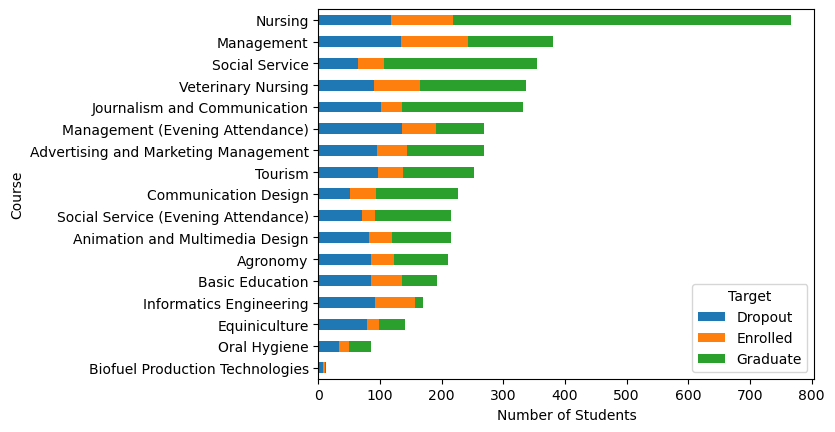

In [25]:
course_codes = sorted(df['Course'].unique())

course_index_map = {code: i for i, code in enumerate(course_codes)}
df['Course_ID'] = df['Course'].map(course_index_map)

course_names = [
    'Biofuel Production Technologies', 'Animation and Multimedia Design',
    'Social Service (Evening Attendance)', 'Agronomy', 'Communication Design',
    'Veterinary Nursing', 'Informatics Engineering', 'Equiniculture',
    'Management', 'Social Service', 'Tourism', 'Nursing', 'Oral Hygiene',
    'Advertising and Marketing Management', 'Journalism and Communication',
    'Basic Education', 'Management (Evening Attendance)'
]
course_name_map = {i: name for i, name in enumerate(course_names)}

# Create a pivot table to count the number of students in each course and target
student_course = df.groupby(['Course_ID', 'Target']).size().reset_index().pivot(columns='Target', index='Course_ID', values=0)

student_course.index = student_course.index.map(course_name_map)

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Course')
plt.show()

df.drop(columns=['Course_ID'], inplace=True)

C:\Users\Martina\AppData\Local\Temp\ipykernel_4332\3924111311.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_course = df.groupby(['Course_ID', 'Target']).size().reset_index().pivot(columns='Target', index='Course_ID', values=0)


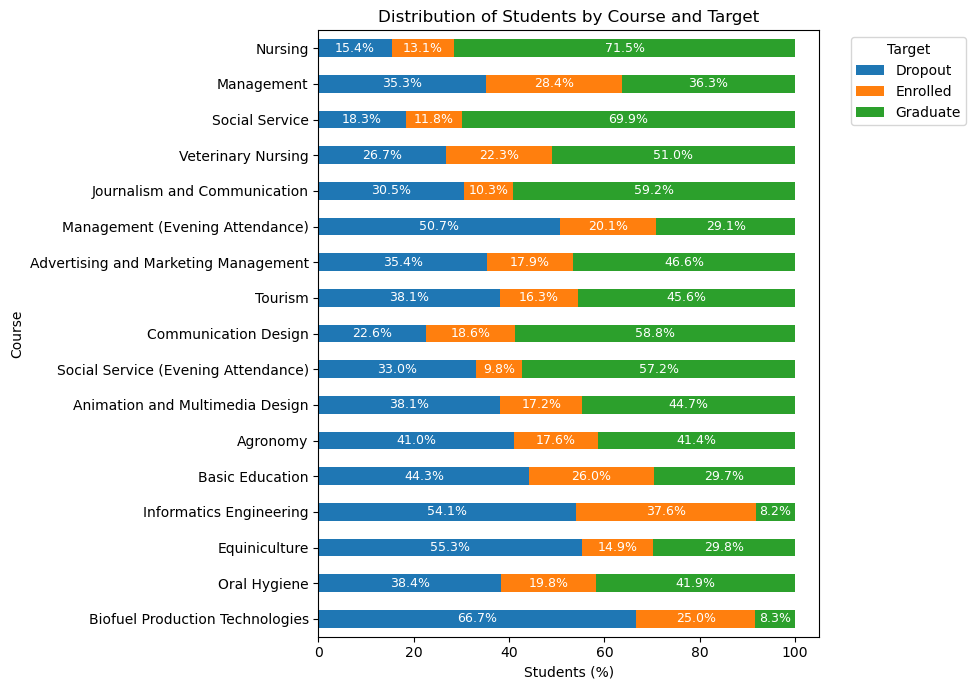

In [26]:
course_codes = sorted(df['Course'].unique())

course_index_map = {code: i for i, code in enumerate(course_codes)}
df['Course_ID'] = df['Course'].map(course_index_map)

course_names = [
    'Biofuel Production Technologies', 'Animation and Multimedia Design',
    'Social Service (Evening Attendance)', 'Agronomy', 'Communication Design',
    'Veterinary Nursing', 'Informatics Engineering', 'Equiniculture',
    'Management', 'Social Service', 'Tourism', 'Nursing', 'Oral Hygiene',
    'Advertising and Marketing Management', 'Journalism and Communication',
    'Basic Education', 'Management (Evening Attendance)'
]
course_name_map = {i: name for i, name in enumerate(course_names)}

# Create a pivot table to count the number of students in each course and target
student_course = df.groupby(['Course_ID', 'Target']).size().reset_index().pivot(columns='Target', index='Course_ID', values=0)

student_course.index = student_course.index.map(course_name_map)
student_course_percent = student_course.div(student_course.sum(axis=1), axis=0) * 100

# Ordina per totale studenti
student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)

# Plot
ax = student_course_percent.loc[student_course_sorted.index].plot(
    kind='barh', stacked=True, figsize=(10, 7)
)

plt.xlabel('Students (%)')
plt.ylabel('Course')
plt.title('Distribution of Students by Course and Target')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Aggiungi etichette percentuali su ogni barra
for i, (index, row) in enumerate(student_course_percent.loc[student_course_sorted.index].iterrows()):
    cumulative = 0
    for target in row.index:
        value = row[target]
        if value > 5:  # mostra solo se > 5% (per evitare sovrapposizioni inutili)
            ax.text(
                cumulative + value / 2, i, f"{value:.1f}%",
                ha='center', va='center', fontsize=9, color='white'
            )
        cumulative += value

plt.tight_layout()
plt.show()
df.drop(columns=['Course_ID'], inplace=True)

### NATIONALITY

In [27]:
# Check the number of unique values in the 'Nazionality' column
df['Nationality'].nunique()
# Check the unique values in the 'Nazionality' column
df['Nationality'].value_counts()

Nationality
1      4314
41       38
26       14
6        13
22       13
24        5
11        3
103       3
100       3
105       2
101       2
62        2
25        2
2         2
21        2
32        1
17        1
14        1
13        1
108       1
109       1
Name: count, dtype: int64

C:\Users\Martina\AppData\Local\Temp\ipykernel_4332\228511480.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_nationality = df.groupby(['Nat_ID', 'Target']).size().reset_index().pivot(columns='Target', index='Nat_ID', values=0)


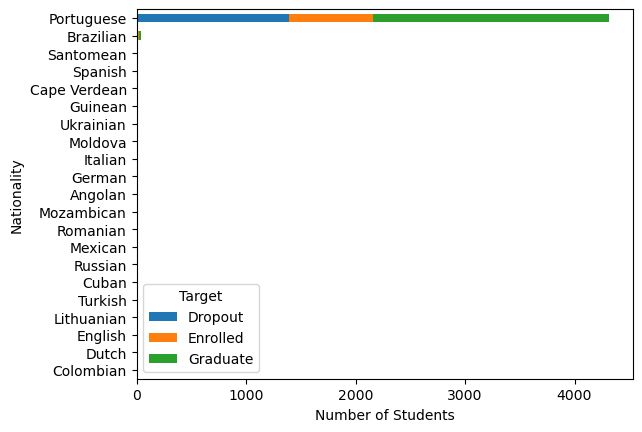

In [28]:
nat_codes = sorted(df['Nationality'].unique())

nat_index_map = {code: i for i, code in enumerate(nat_codes)}
df['Nat_ID'] = df['Nationality'].map(nat_index_map)

nat_names = [
    'Portuguese','German', 'Spanish', 'Italian', 'Dutch', 'English','Lithuanian', 
    'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican', 'Santomean', 
    'Turkish', 'Brazilian', 'Romanian', 'Moldova', 'Mexican','Ukrainian', 'Russian', 'Cuban', 'Colombian'
]
nat_name_map = {i: name for i, name in enumerate(nat_names)}

# Create a pivot table to count the number of students in each course and target
student_nationality = df.groupby(['Nat_ID', 'Target']).size().reset_index().pivot(columns='Target', index='Nat_ID', values=0)

student_nationality.index = student_nationality.index.map(nat_name_map)

student_nationality_total = student_nationality.sum(axis=1)
student_nationality_sorted  = student_nationality_total.sort_values(ascending=True)
student_nationality.loc[student_nationality_sorted.index].plot(kind='barh', stacked=True)
plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()

df.drop(columns=['Nat_ID'], inplace=True)


### PREVIOUS QUALIFICATION

C:\Users\Martina\AppData\Local\Temp\ipykernel_4332\3972580336.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_prequal = df.groupby(['PQ_ID', 'Target']).size().reset_index().pivot(columns='Target', index='PQ_ID', values=0)


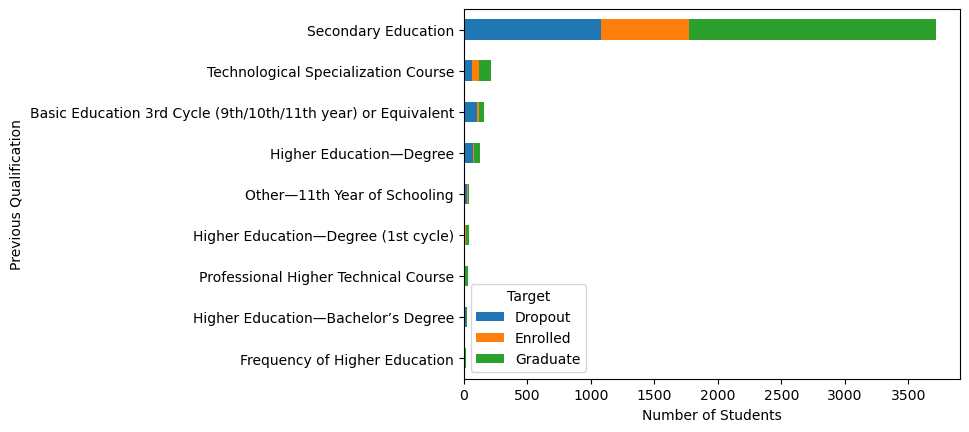

In [29]:
pq_codes = sorted(df['Previous_qualification'].unique())

pq_index_map = {code: i for i, code in enumerate(pq_codes)}
df['PQ_ID'] = df['Previous_qualification'].map(pq_index_map)

pq_names = [
    'Secondary Education','Higher Education—Bachelor’s Degree','Higher Education—Degree',
    'Higher Education—Master’s Degree','Higher Education—Doctorate','Frequency of Higher Education',
    '12th Year of Schooling—Not Completed','11th Year of Schooling—Not Completed',
    'Other—11th Year of Schooling','10th Year of Schooling','10th Year of Schooling—Not Completed',
    'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent','Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent',
    'Technological Specialization Course','Higher Education—Degree (1st cycle)','Professional Higher Technical Course',
    'Higher Education—Master’s Degree (2nd Cycle)'
]
pq_name_map = {i: name for i, name in enumerate(pq_names)}

# Create a pivot table to count the number of students in each course and target
student_prequal = df.groupby(['PQ_ID', 'Target']).size().reset_index().pivot(columns='Target', index='PQ_ID', values=0)

student_prequal.index = student_prequal.index.map(pq_name_map)


student_prequal_total = student_prequal.sum(axis=1)
student_prequal_sorted = student_prequal_total.sort_values(ascending=True)
student_prequal_top = student_prequal_sorted[8:]
student_prequal.loc[student_prequal_top.index].plot(kind='barh', stacked=True)

plt.xlabel('Count')
plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.show()

df.drop(columns=['PQ_ID'], inplace=True)

### SEMESTER PROGRESS

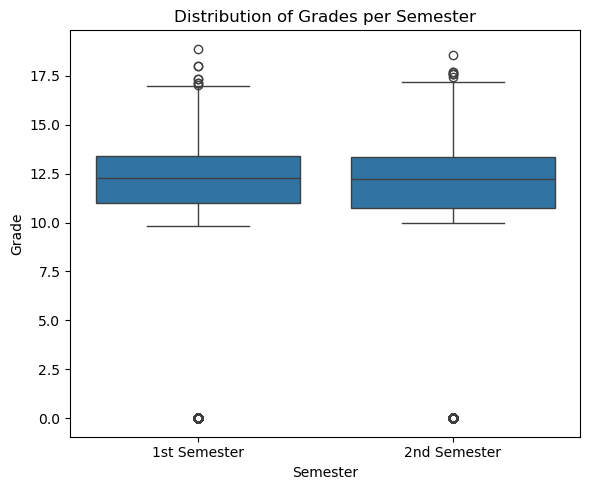

In [30]:
# Riorganizza i dati in formato "long" per semplificare il confronto
grades_df = df[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].copy()
grades_df.columns = ['1st Semester', '2nd Semester']
grades_long = grades_df.melt(var_name='Semester', value_name='Grade')

# Boxplot per confrontare le distribuzioni dei voti
plt.figure(figsize=(6, 5))
sns.boxplot(data=grades_long, x='Semester', y='Grade')
plt.title('Distribution of Grades per Semester')
plt.ylabel('Grade')
plt.xlabel('Semester')
plt.tight_layout()
plt.show()

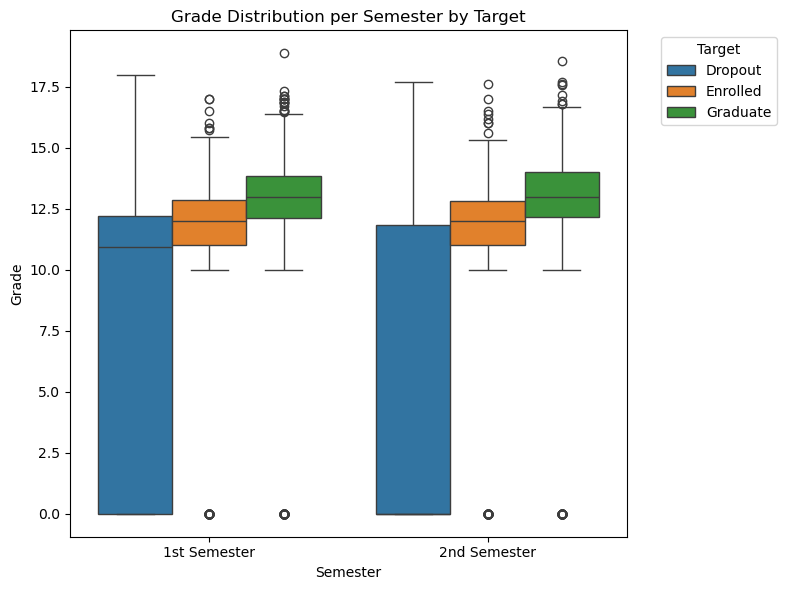

In [31]:
# Crea un DataFrame in formato "long" per plotting
grades_target = df[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade', 'Target']].copy()
grades_target = grades_target.rename(columns={
    'Curricular_units_1st_sem_grade': '1st Semester',
    'Curricular_units_2nd_sem_grade': '2nd Semester'
})

# Riorganizza i dati
grades_long = grades_target.melt(id_vars='Target', var_name='Semester', value_name='Grade')

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=grades_long, x='Semester', y='Grade', hue='Target')
plt.title('Grade Distribution per Semester by Target')
plt.ylabel('Grade')
plt.xlabel('Semester')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Martina\AppData\Local\Temp\ipykernel_4332\4256339911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approved_by_target = df.groupby('Target')[


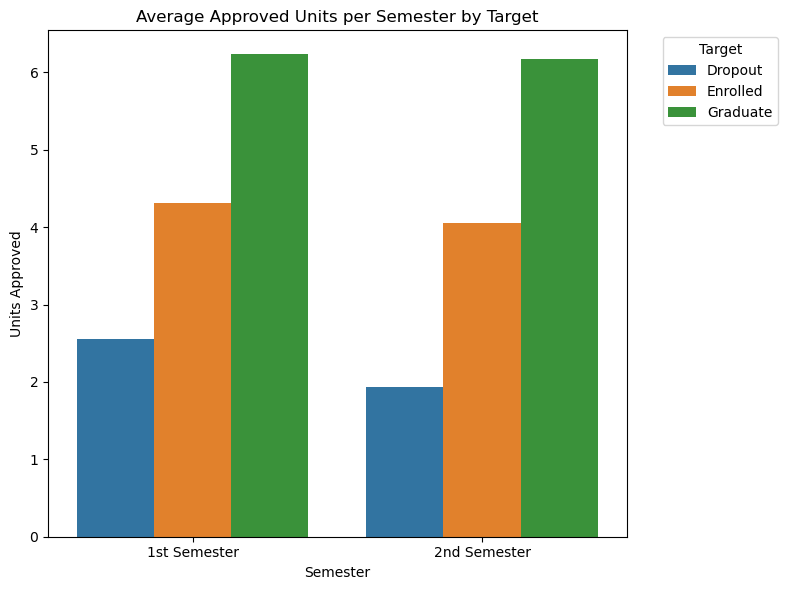

In [32]:
# Calcola la media delle unità approvate per Target e semestre
approved_by_target = df.groupby('Target')[
    ['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved']
].mean().reset_index()

# Riorganizza in formato long
approved_long = approved_by_target.melt(id_vars='Target', var_name='Semester', value_name='Units Approved')
approved_long['Semester'] = approved_long['Semester'].replace({
    'Curricular_units_1st_sem_approved': '1st Semester',
    'Curricular_units_2nd_sem_approved': '2nd Semester'
})

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=approved_long, x='Semester', y='Units Approved', hue='Target')
plt.title('Average Approved Units per Semester by Target')
plt.ylabel('Units Approved')
plt.xlabel('Semester')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


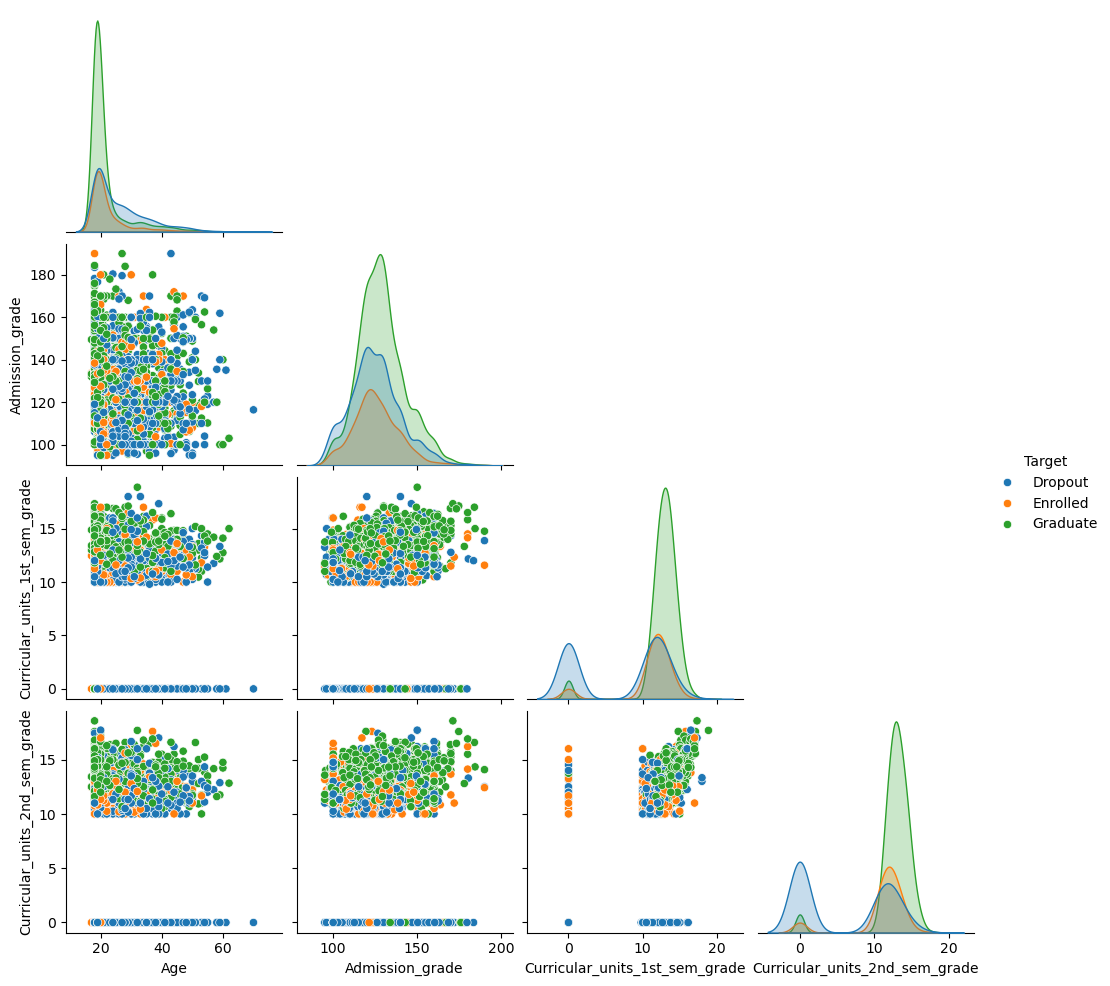

In [33]:
cols = ['Age', 'Admission_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade', 'Target']
sns.pairplot(df[cols], hue='Target', corner=True)


In [44]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nationality', 'Mother_qualification',
       'Father_qualification', 'Mother_occupation', 'Father_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemp

## Correlation analysis

In [45]:
# Encode the labels as ordinal data (0 - 'Dropout', 1 - 'Enrolled', and 2 - 'Graduate') 
df['Target_encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(df[['Target']])

# Drop 'Target' variable
df.drop('Target', axis = 1, inplace = True)

KeyError: "None of [Index(['Target'], dtype='object')] are in the [columns]"

**Chi square test for categorical features**

In [46]:
cats = df.select_dtypes(include=['category']).columns.tolist()
print(cats)

['Marital_status', 'Application_mode', 'Course', 'Daytime/evening_attendance', 'Previous_qualification', 'Nationality', 'Mother_qualification', 'Father_qualification', 'Mother_occupation', 'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Target_encoded']


In [47]:
# Get the p-values from Chi-Square indenpendence tests
p_value = []

for col in cats:
    crosstable = pd.crosstab(index = df[col], 
                             columns = df['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Variable,P_value
0,Marital_status,0.00000
15,Scholarship_holder,0.00000
14,Gender,0.00000
13,Tuition_fees_up_to_date,0.00000
12,Debtor,0.00000
10,Displaced,0.00000
9,Father_occupation,0.00000
8,Mother_occupation,0.00000
6,Mother_qualification,0.00000
4,Previous_qualification,0.00000


In [ ]:
#stud_selected = df.drop(['Nationality', 'International', 'Educational_special_needs'], axis = 1)  

In [48]:
cats = df.select_dtypes(include=['category']).columns.tolist()

# Funzione per calcolare Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Calcolo Cramér's V solo per queste
cramers_v_values = []
for var in cats:
    v = cramers_v(df[var], df['Target_encoded'])
    cramers_v_values.append(round(v, 3))

# Risultato finale
cramers_df = pd.DataFrame({
    'Variable': cats,
    'Cramers_V': cramers_v_values
}).sort_values('Cramers_V', ascending=False)

cramers_df


,Variable,Cramers_V
17,Target_encoded,1.000
13,Tuition_fees_up_to_date,0.431
15,Scholarship_holder,0.304
2,Course,0.251
12,Debtor,0.242
14,Gender,0.230
1,Application_mode,0.230
8,Mother_occupation,0.182
9,Father_occupation,0.173
7,Father_qualification,0.159


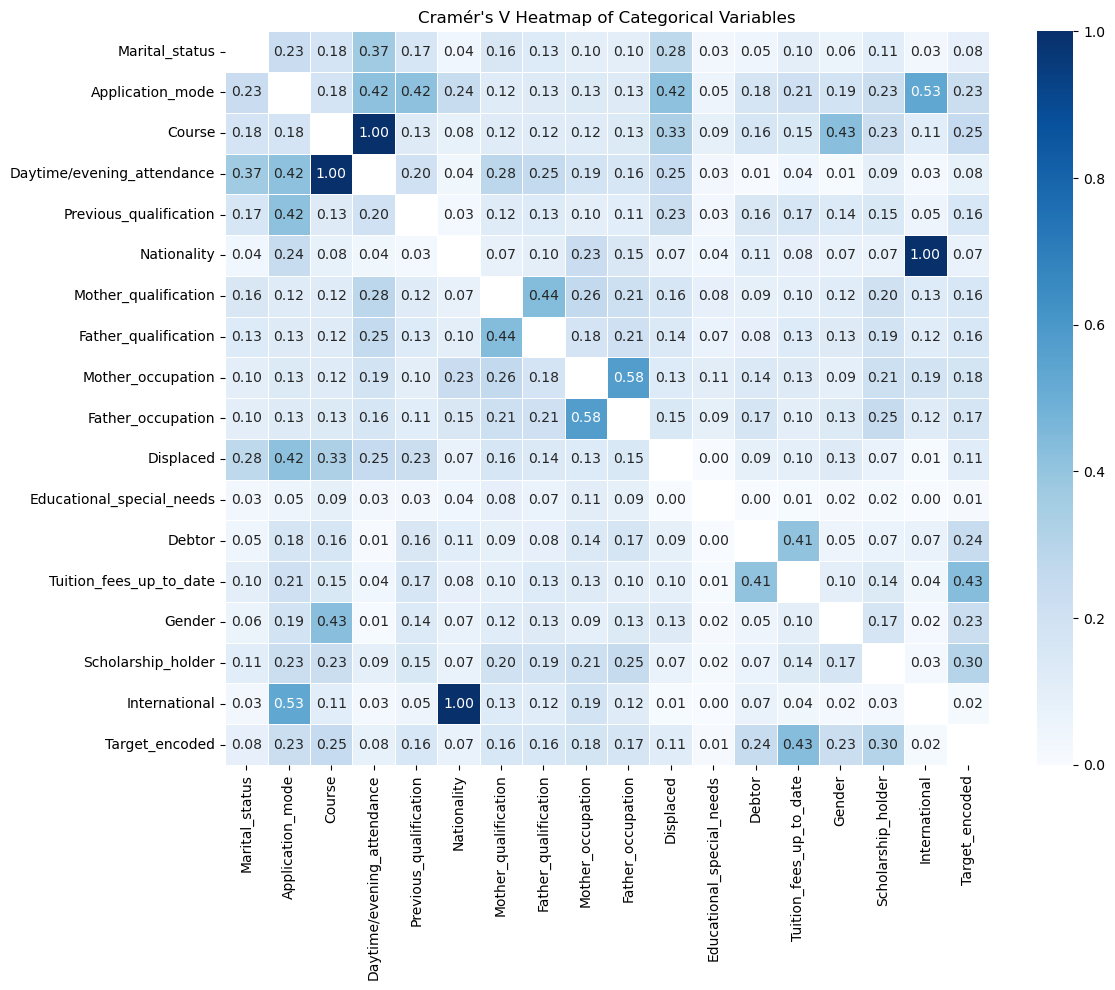

In [49]:
significant_vars = df.select_dtypes(include=['category']).columns.tolist()

# Crea matrice vuota
cramers_matrix = pd.DataFrame(index=significant_vars, columns=significant_vars)

# Calcola Cramér's V per ogni coppia
for var1, var2 in combinations(significant_vars, 2):
    v = cramers_v(df[var1], df[var2])
    cramers_matrix.loc[var1, var2] = v
    cramers_matrix.loc[var2, var1] = v

# Riempi la diagonale con 1
np.fill_diagonal(cramers_matrix.values.astype(float), 1.0)

# Converte tutto in float
cramers_matrix = cramers_matrix.astype(float)

# Plot della heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.tight_layout()
plt.show()

**Numerical features**

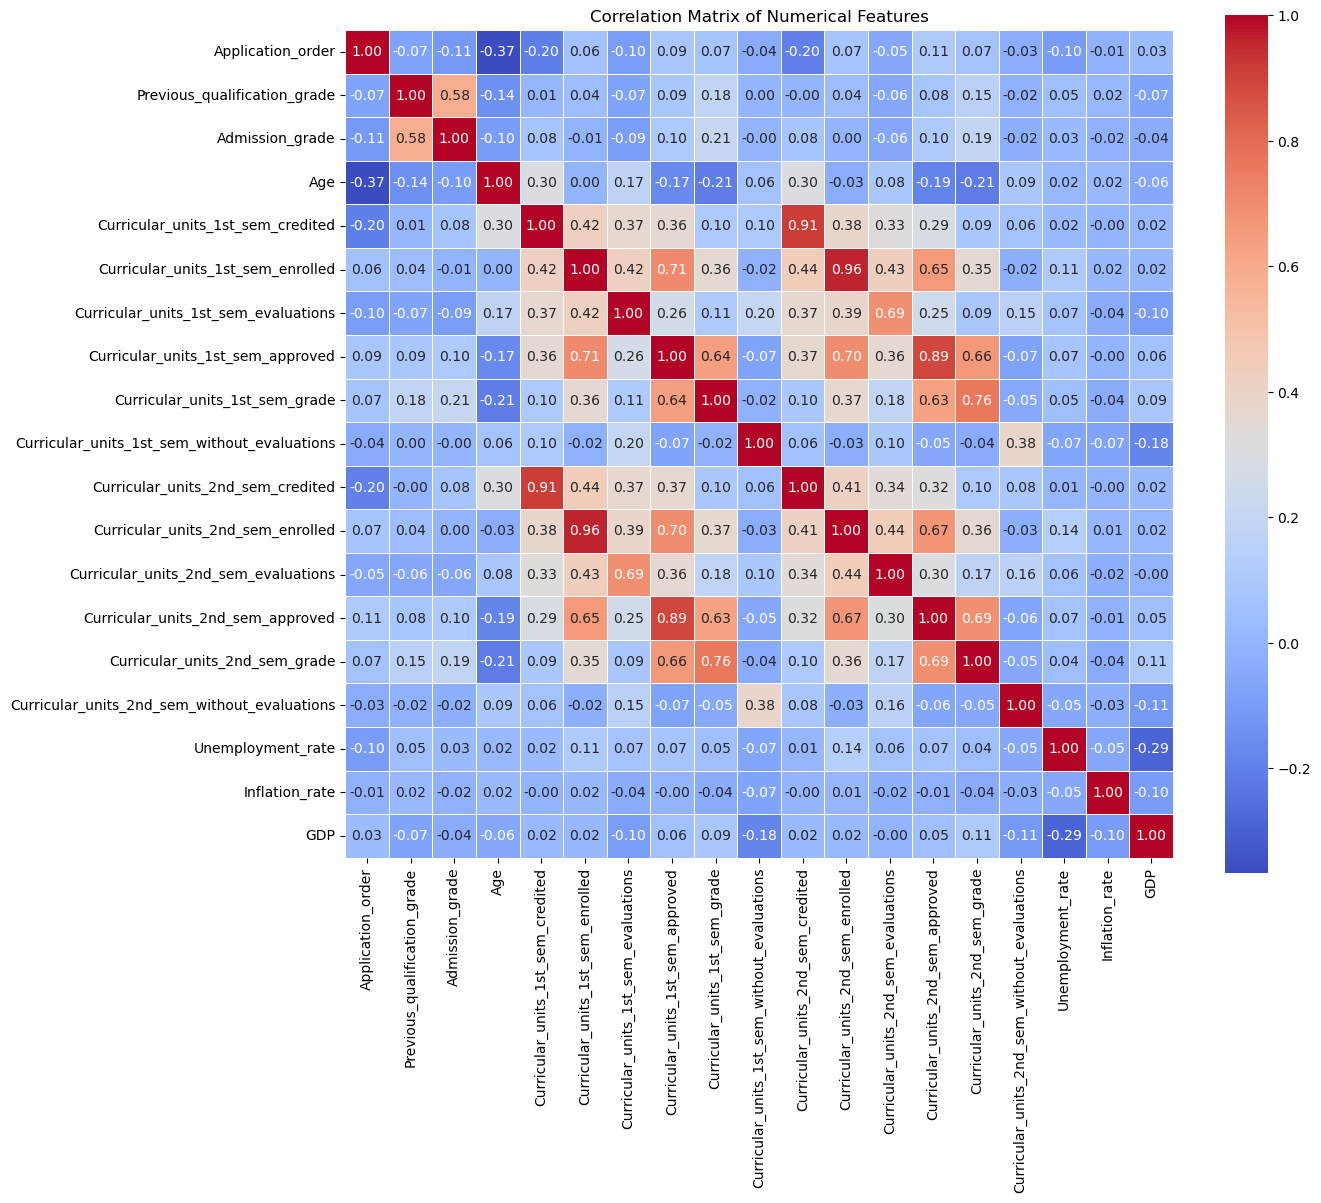

In [50]:
# Seleziona solo le colonne numeriche
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcola la matrice di correlazione (metodo di default = Pearson)
corr_matrix = df[numeric_cols].corr(method='spearman')

# Visualizza la heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()
